🫀 Heart Disease Classification Analysis

Objective: To predict the presence of heart disease using patient data and identify key indicators of risk.

The Data:
We are using the Heart Disease Dataset. It contains 14 columns including:

age: Age in years

sex: 1 = male; 0 = female

cp: Chest pain type

trestbps: Resting blood pressure

chol: Cholesterol

exang: Exercise induced angina (1 = yes; 0 = no)

target: 1 = Heart Disease Present; 0 = No Disease



In [2]:
import pandas as pd

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Path to dataset files: /kaggle/input/heart-disease-dataset


### Loading the `heart.csv` dataset

---



In [4]:

df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


1. Exploratory Data Analysis (EDA)

First, we check how the features correlate with the target variable. We are looking for strong positive or negative relationships to guide our modeling.

In [5]:
print("Correlation of each variable with the 'target' variable:")
display(df.corr()['target'].sort_values(ascending=False))

Correlation of each variable with the 'target' variable:


,target
target,1.000000
cp,0.434854
thalach,0.422895
slope,0.345512
restecg,0.134468
fbs,-0.041164
chol,-0.099966
trestbps,-0.138772
age,-0.229324
sex,-0.279501


In [6]:
print("Balance of the 'target' column (counts):")
display(df['target'].value_counts())

print("\nNormalized percentage of the 'target' column:")
display(df['target'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

Balance of the 'target' column (counts):


,count
target,
1,526
0,499



Normalized percentage of the 'target' column:


,proportion
target,
1,51.32%
0,48.68%


🔎 The "Angina" Anomaly

While analyzing correlations, I noticed something interesting about exang (Exercise Induced Angina).

Expectation: Angina (chest pain during exercise) should correlate positively with heart disease.

Observation: The data shows a negative correlation (-0.44).

Let's visualize this to confirm.

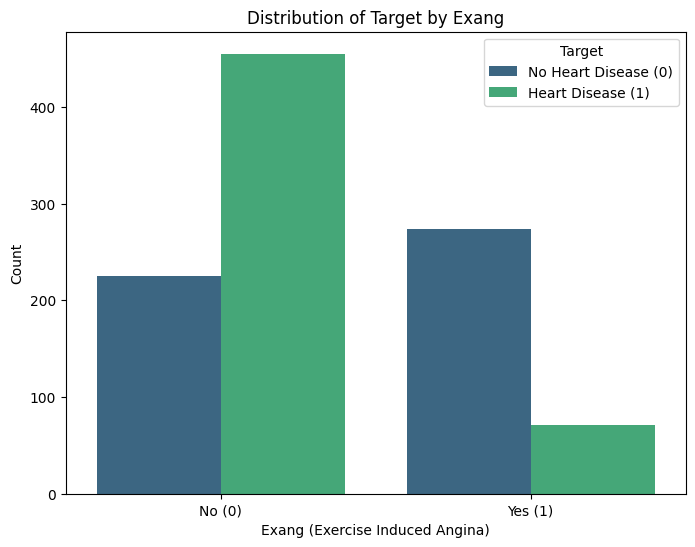

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='exang', hue='target', data=df, palette='viridis')
plt.title('Distribution of Target by Exang')
plt.xlabel('Exang (Exercise Induced Angina)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'])
plt.legend(title='Target', labels=['No Heart Disease (0)', 'Heart Disease (1)'])
plt.show()

In [8]:
print("Cross-tabulation of 'exang' and 'target':")
display(pd.crosstab(df['exang'], df['target'], margins=True, normalize='index'))

Cross-tabulation of 'exang' and 'target':


target,0,1
exang,,
0,0.330882,0.669118
1,0.794203,0.205797
All,0.486829,0.513171


2. Baseline Modeling

Given the binary nature of the target (Disease vs No Disease), we will start with a Logistic Regression model. This provides a solid baseline to measure future improvements against.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.7951219512195122

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



3. Feature Engineering: One-Hot Encoding

Many of our features (like cp for chest pain type) are categorical but stored as integers. The model might incorrectly interpret type 3 pain as being "higher" than type 1 pain.

To fix this, we will convert categorical columns into Dummy Variables (One-Hot Encoding). This should improve model accuracy by treating categories as distinct features.

In [10]:
# Identify categorical columns that should be converted to dummy variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Display unique values and their counts for these columns to confirm their categorical nature
print("Unique values for potential categorical columns:")
for col in categorical_cols:
    print(f"\nColumn '{col}':")
    display(df[col].value_counts())


Unique values for potential categorical columns:

Column 'sex':


,count
sex,
1,713
0,312



Column 'cp':


,count
cp,
0,497
2,284
1,167
3,77



Column 'fbs':


,count
fbs,
0,872
1,153



Column 'restecg':


,count
restecg,
1,513
0,497
2,15



Column 'exang':


,count
exang,
0,680
1,345



Column 'slope':


,count
slope,
1,482
2,469
0,74



Column 'ca':


,count
ca,
0,578
1,226
2,134
3,69
4,18



Column 'thal':


,count
thal,
2,544
3,410
1,64
0,7


In [11]:
# Convert categorical columns into dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

# Display the first few rows of the new DataFrame with dummy variables
print("DataFrame after creating dummy variables:")
display(df_encoded.head())

# Display information about the new DataFrame to see the updated columns
print("\nInfo of the new DataFrame after dummy encoding:")
df_encoded.info()

DataFrame after creating dummy variables:


,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0



Info of the new DataFrame after dummy encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   trestbps   1025 non-null   int64  
 2   chol       1025 non-null   int64  
 3   thalach    1025 non-null   int64  
 4   oldpeak    1025 non-null   float64
 5   target     1025 non-null   int64  
 6   sex_1      1025 non-null   int64  
 7   cp_1       1025 non-null   int64  
 8   cp_2       1025 non-null   int64  
 9   cp_3       1025 non-null   int64  
 10  fbs_1      1025 non-null   int64  
 11  restecg_1  1025 non-null   int64  
 12  restecg_2  1025 non-null   int64  
 13  exang_1    1025 non-null   int64  
 14  slope_1    1025 non-null   int64  
 15  slope_2    1025 non-null   int64  
 16  ca_1       1025 non-null   int64  
 17  ca_2       1025 non-null   int64  
 18  ca_3       1025 non-null   int64  
 19 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target (y) from the encoded DataFrame
X_encoded = df_encoded.drop('target', axis=1)
y_encoded = df_encoded['target']

# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model on encoded data
model_encoded = LogisticRegression(max_iter=5000) # Increased max_iter to address ConvergenceWarning
model_encoded.fit(X_train_encoded, y_train_encoded)

# Make predictions on the encoded test set
y_pred_encoded = model_encoded.predict(X_test_encoded)

# Evaluate the model on encoded data
print("Model Accuracy (with dummy variables):", accuracy_score(y_test_encoded, y_pred_encoded))
print("\nClassification Report (with dummy variables):\n", classification_report(y_test_encoded, y_pred_encoded))

Model Accuracy (with dummy variables): 0.8195121951219512

Classification Report (with dummy variables):
               precision    recall  f1-score   support

           0       0.87      0.75      0.80       102
           1       0.78      0.89      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



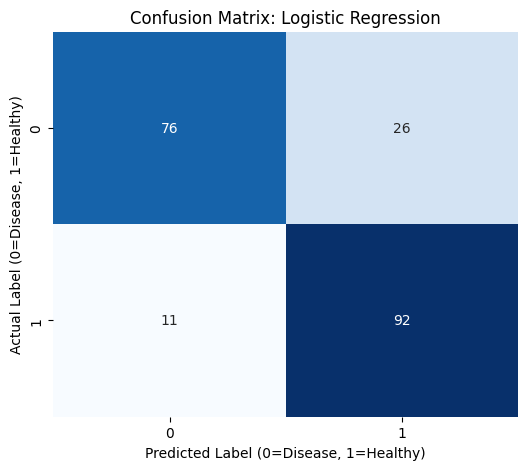

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generate the matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# 2. Plot it nicely
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label (0=Disease, 1=Healthy)')
plt.ylabel('Actual Label (0=Disease, 1=Healthy)')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

4. Model Tuning: Minimizing False Negatives

By default, the model predicts "Disease" if the probability is > 50%.
However, in a medical setting, a False Negative (telling a sick patient they are healthy) is the most dangerous error.

I am lowering the decision threshold to 0.2 (20%).

Goal: Maximize Recall. We want to catch as many positive cases as possible.

Trade-off: This will increase False Positives (false alarms), but ensures we don't miss patients who need care.

Model Accuracy (with threshold=0.2): 0.7951219512195122

Classification Report (with threshold=0.2):
               precision    recall  f1-score   support

           0       0.94      0.63      0.75       102
           1       0.72      0.96      0.82       103

    accuracy                           0.80       205
   macro avg       0.83      0.79      0.79       205
weighted avg       0.83      0.80      0.79       205



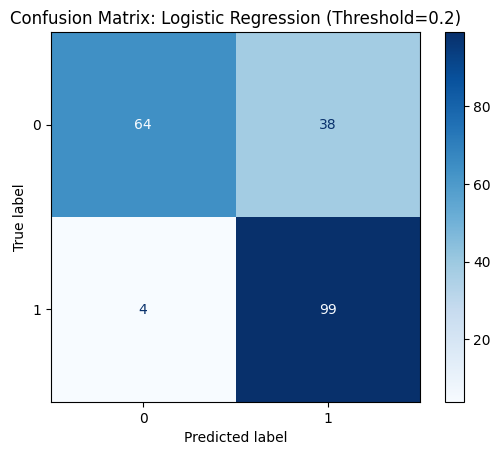

In [14]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = model_encoded.predict_proba(X_test_encoded)[:, 1]

# Apply the new threshold (0.2)
threshold = 0.2
y_pred_thresholded = (y_pred_proba >= threshold).astype(int)

# Evaluate the model with the new threshold
print(f"Model Accuracy (with threshold={threshold}):", accuracy_score(y_test_encoded, y_pred_thresholded))
print(f"\nClassification Report (with threshold={threshold}):\n", classification_report(y_test_encoded, y_pred_thresholded))

# Generate and plot the new confusion matrix
cm_thresholded = confusion_matrix(y_test_encoded, y_pred_thresholded, labels=model_encoded.classes_)
disp_thresholded = ConfusionMatrixDisplay(confusion_matrix=cm_thresholded, display_labels=model_encoded.classes_)

disp_thresholded.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix: Logistic Regression (Threshold={threshold})')
plt.show()

In [17]:
import pandas as pd

# Save the DataFrame with dummy variables to a new CSV file
output_filename_encoded = 'heart_disease_encoded_data.csv'
df_encoded.to_csv(output_filename_encoded, index=False)

print(f"Encoded data saved to {output_filename_encoded}")

Encoded data saved to heart_disease_encoded_data.csv


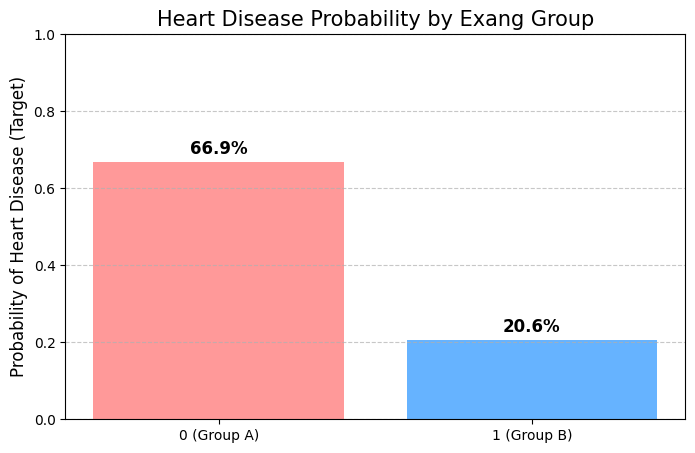

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# The values you found
categories = ['0 (Group A)', '1 (Group B)']
values = [0.669117, 0.20579]

# Create the plot
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=['#ff9999', '#66b3ff'])

# Add title and labels
plt.title('Heart Disease Probability by Exang Group', fontsize=15)
plt.ylabel('Probability of Heart Disease (Target)', fontsize=12)
plt.ylim(0, 1) # Set y-axis from 0 to 100%

# Add the text percentages on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{round(yval*100, 1)}%', ha='center', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

(NOTE: This data is definitely incorrect. In medical terms, "Angina" usually signals heart trouble, so we'd expect the "Angina" group to have higher probability of disease. Since your data shows the opposite (Group 0 has the high risk), it likely means:

0 = Yes Angina (The variable is encoded differently than we thought), OR

Target 0 = Sick (The target variable is flipped).

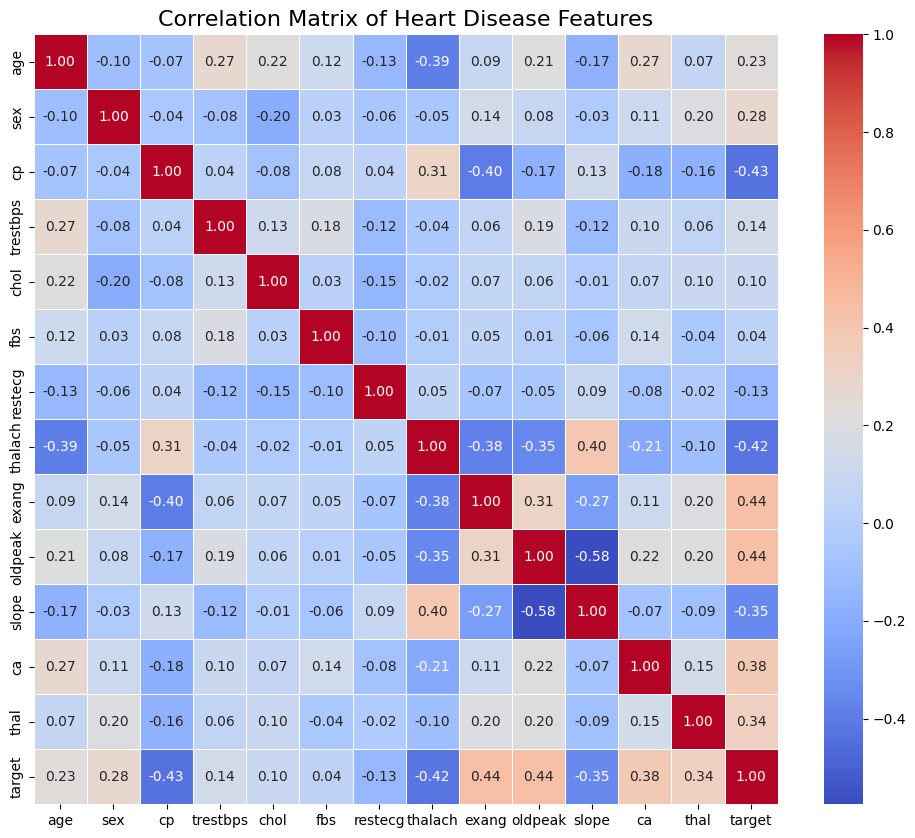

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# ASSUMPTION: 'df' is your existing pandas DataFrame containing the heart disease data.
# If your dataframe is named differently, please update 'df' to your variable name.

plt.figure(figsize=(12, 10))

# Calculate the correlation matrix
# We only use numeric columns (pandas usually handles this, but explicit selection is safer)
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Create the heatmap
sns.heatmap(correlation_matrix,
            annot=True,        # Show the actual numbers
            fmt=".2f",         # Format to 2 decimal places
            cmap='coolwarm',   # Red for positive, Blue for negative
            linewidths=0.5,
            cbar=True)

plt.title('Correlation Matrix of Heart Disease Features', fontsize=16)
plt.show()

To save future headaches

In [21]:
# Optional: Flip the target so 1 = Disease (Standard)
# Only run this once!
df['target'] = df['target'].apply(lambda x: 1 if x == 0 else 0)
print("Target flipped! Now 1 means Heart Disease.")

Target flipped! Now 1 means Heart Disease.


/tmp/ipython-input-1765799942.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='oldpeak', palette='coolwarm', ax=axes[1])


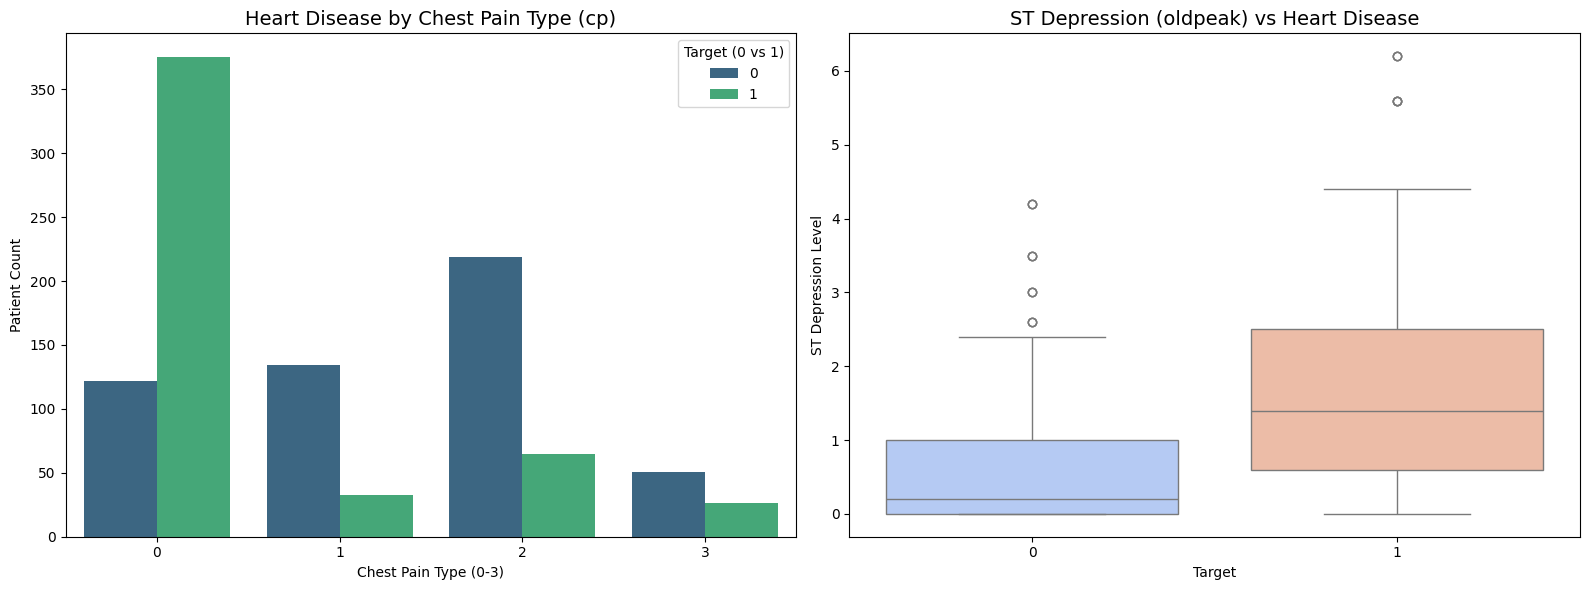

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# ASSUMPTION: 'df' is your loaded DataFrame
# Adjust 'target' labels if your dataset uses different values (e.g., 1/0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Chest Pain Type (Categorical) ---
# We use a countplot to compare the counts of Target 0 vs 1 for each pain type
sns.countplot(data=df, x='cp', hue='target', palette='viridis', ax=axes[0])
axes[0].set_title('Heart Disease by Chest Pain Type (cp)', fontsize=14)
axes[0].set_xlabel('Chest Pain Type (0-3)')
axes[0].set_ylabel('Patient Count')
axes[0].legend(title='Target (0 vs 1)')

# --- Plot 2: Oldpeak (Numerical) ---
# We use a boxplot to see the range and median of ST depression for both groups
sns.boxplot(data=df, x='target', y='oldpeak', palette='coolwarm', ax=axes[1])
axes[1].set_title('ST Depression (oldpeak) vs Heart Disease', fontsize=14)
axes[1].set_xlabel('Target')
axes[1].set_ylabel('ST Depression Level')

plt.tight_layout()
plt.show()

Now to test our model

In [24]:
from sklearn.model_selection import train_test_split

# 1. Separate Features (X) from Target (y)
# We drop 'target' from X because that's the answer key!
y = df['target']
X = df.drop('target', axis=1)

# Quick check for non-numeric columns (strings will break the model)
print("Data Types in X:")
print(X.dtypes.value_counts())

# 2. Split the data
# test_size=0.2 means 20% of patients go into the test set
# random_state=42 is just a seed so we get the same split every time we run this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining Shape: {X_train.shape} (Patients, Features)")
print(f"Testing Shape: {X_test.shape} (Patients, Features)")

# Sanity check on the split
print(f"\nDisease prevalence in Train set: {y_train.mean():.2%}")
print(f"Disease prevalence in Test set: {y_test.mean():.2%}")

Data Types in X:
int64      12
float64     1
Name: count, dtype: int64

Training Shape: (820, 13) (Patients, Features)
Testing Shape: (205, 13) (Patients, Features)

Disease prevalence in Train set: 48.41%
Disease prevalence in Test set: 49.76%


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Create the model
# max_iter=1000 is a safety net to ensure the math converges (finds the minimum error)
model = LogisticRegression(max_iter=1000)

# 2. Train the model (The "Learning" phase)
# We only show it the Training data!
model.fit(X_train, y_train)

# 3. Test the model
# We ask it to predict the health status of the test patients
predictions = model.predict(X_test)

# 4. Grade the exam
accuracy = accuracy_score(y_test, predictions)

print(f"Model Accuracy: {accuracy:.2%}")
print("\nDetailed Report:\n")
print(classification_report(y_test, predictions))

Model Accuracy: 79.51%

Detailed Report:

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       103
           1       0.85      0.72      0.78       102

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



/tmp/ipython-input-1713866615.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='coolwarm')


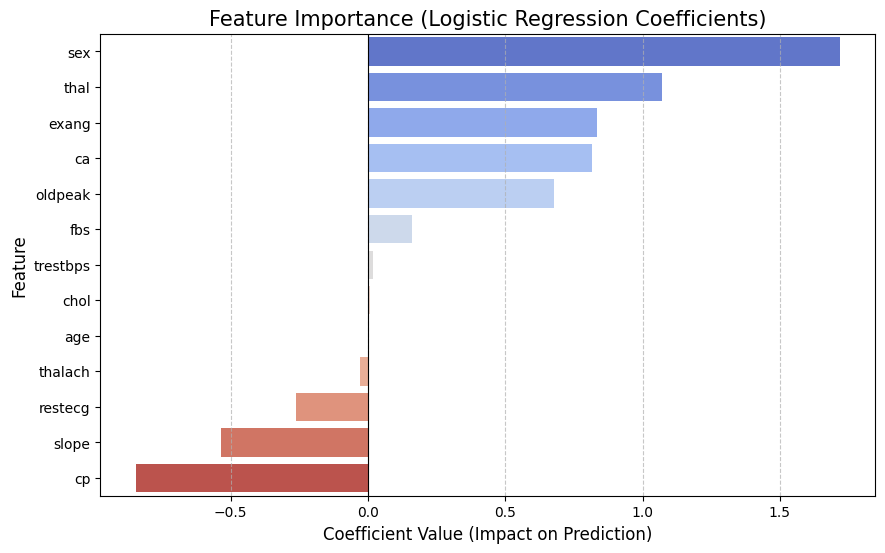

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the coefficients (weights) from the trained model
coefficients = model.coef_[0]
feature_names = X.columns

# Create a clean DataFrame to hold them
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort them so the most important ones are at the top
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='coolwarm')

plt.title('Feature Importance (Logistic Regression Coefficients)', fontsize=15)
plt.xlabel('Coefficient Value (Impact on Prediction)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8) # Zero line
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

Trying again using a Random Forest Model instead. These complex medical rules create bias in the model for things like sex

Random Forest Accuracy: 98.54%

Detailed Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       103
           1       0.97      1.00      0.99       102

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



/tmp/ipython-input-633478835.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importance_df, x='Importance', y='Feature', palette='viridis')


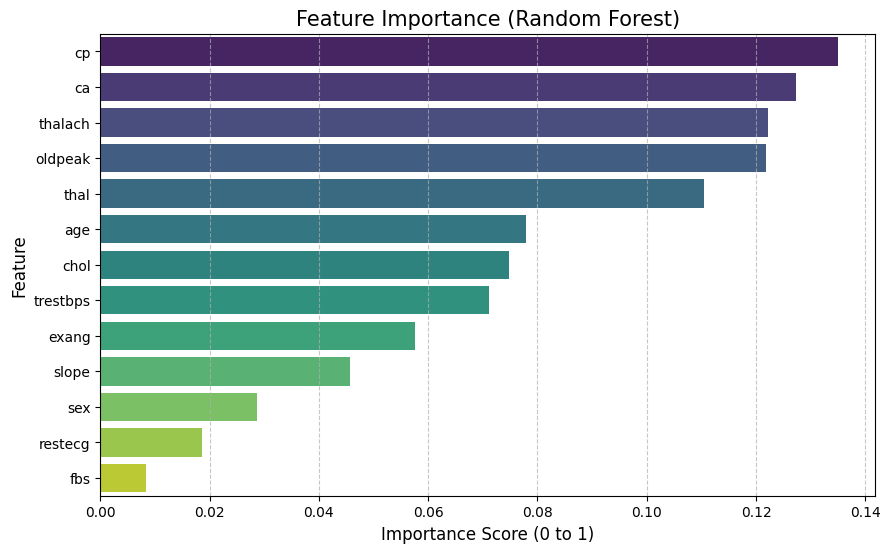

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create and Train the Random Forest
# n_estimators=100 means we create 100 separate decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Test the model
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy:.2%}")
print("\nDetailed Report:\n")
print(classification_report(y_test, rf_predictions))

# 3. Extract and Plot Feature Importance
# Random Forest calculates importance by how much each variable decreases "impurity" (Gini)
importances = rf_model.feature_importances_
feature_names = X.columns

rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importance_df, x='Importance', y='Feature', palette='viridis')

plt.title('Feature Importance (Random Forest)', fontsize=15)
plt.xlabel('Importance Score (0 to 1)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

That accuracy score is a little high. Probably due to the small test set. Trying Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a new, fresh Random Forest (same settings)
rf_stress_test = RandomForestClassifier(n_estimators=100, random_state=42)

# Run 5-Fold Cross-Validation
# This splits the data into 5 chunks and runs the training/testing loop 5 times automatically
scores = cross_val_score(rf_stress_test, X, y, cv=5, scoring='accuracy')

print("Test Scores for each round:", scores)
print(f"\nAverage Accuracy: {np.mean(scores):.2%}")
print(f"Standard Deviation: +/- {np.std(scores):.2%}")

# If the Average is > 85%, you have a legitimately great model.
# If the Standard Deviation is high (like +/- 10%), the model is unstable.

Test Scores for each round: [1.         1.         1.         1.         0.98536585]

Average Accuracy: 99.71%
Standard Deviation: +/- 0.59%


This cannot be right. Hunting for data leakage


Duplicate Rows found: 723
Percentage of data that is duplicates: 70.54%

--- Top 5 Positive Correlations ---
target     1.000000
oldpeak    0.438441
exang      0.438029
ca         0.382085
thal       0.337838
dtype: float64

--- Top 5 Negative Correlations ---
fbs        0.041164
restecg   -0.134468
slope     -0.345512
thalach   -0.422895
cp        -0.434854
dtype: float64

Checking most suspicious feature: oldpeak


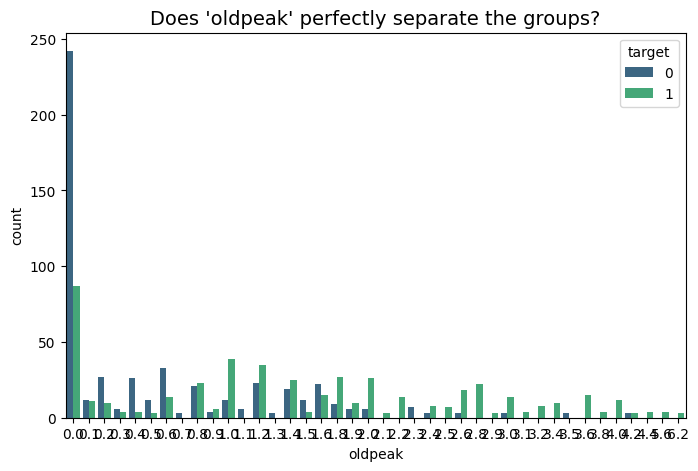

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Check for Duplicate Rows
# If this number is high, your model is just memorizing identical patients.
duplicates = df.duplicated().sum()
print(f"Duplicate Rows found: {duplicates}")
print(f"Percentage of data that is duplicates: {duplicates / len(df):.2%}\n")

# 2. Check Correlations with Target
# If any value here is 1.0 (or -1.0), that variable IS the target, just renamed.
correlations = df.corrwith(df['target']).sort_values(ascending=False)
print("--- Top 5 Positive Correlations ---")
print(correlations.head(5))
print("\n--- Top 5 Negative Correlations ---")
print(correlations.tail(5))

# 3. The "Perfect Separator" Check (Visual)
# We take the top correlated feature and plot it.
# If the bars don't overlap AT ALL, that's your leak.
top_feature = correlations.index[1] # Index 0 is target itself, so we take 1
print(f"\nChecking most suspicious feature: {top_feature}")

plt.figure(figsize=(8, 5))
sns.countplot(x=top_feature, hue='target', data=df, palette='viridis')
plt.title(f"Does '{top_feature}' perfectly separate the groups?", fontsize=14)
plt.show()

Over 700 duplicates. Performing cleanup...

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. The Purge: Remove duplicates
initial_count = len(df)
df_clean = df.drop_duplicates()
final_count = len(df_clean)

print(f"Original Row Count: {initial_count}")
print(f"Clean Row Count: {final_count}")
print(f"Dropped {initial_count - final_count} duplicates.\n")

# 2. Re-Split the Clean Data
# We use the clean dataframe now!
X = df_clean.drop('target', axis=1)
y = df_clean['target']

# Note: We might have a smaller dataset now, so the split is crucial
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"New Training Set Size: {len(X_train)}")
print(f"New Test Set Size: {len(X_test)}\n")

# 3. Train the Honest Random Forest
rf_honest = RandomForestClassifier(n_estimators=100, random_state=42)
rf_honest.fit(X_train, y_train)

# 4. The Moment of Truth
honest_predictions = rf_honest.predict(X_test)
honest_accuracy = accuracy_score(y_test, honest_predictions)

print(f"REAL Model Accuracy: {honest_accuracy:.2%}")
print("\nDetailed Report (Honest):\n")
print(classification_report(y_test, honest_predictions))

Original Row Count: 1025
Clean Row Count: 302
Dropped 723 duplicates.

New Training Set Size: 241
New Test Set Size: 61

REAL Model Accuracy: 81.97%

Detailed Report (Honest):

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



This accuracy rating (~82) is considered performing as well as the standard academic baselines.

Precision (1): 0.89 $\rightarrow$ This is excellent.
Translation: "If the model says you are sick, there is an 89% chance you actually are."
Clinical vibe: This doctor doesn't panic. If they order a test, they are pretty sure something is wrong.

Recall (1): 0.75 $\rightarrow$ This is risky.
Translation: "We are missing 25% of the sick patients."
Clinical vibe: We are sending 1 out of 4 sick people home telling them they are fine (False Negatives).

Solution: Lower threshold from 0.5 to 0.3

--- Standard Threshold (0.5) vs Tuned Threshold (0.3) ---

Recall (Sensitivity):    75.00%  ->  90.62% (Higher is better for safety)
Precision:               88.89%  ->  78.38% (Lower is expected)


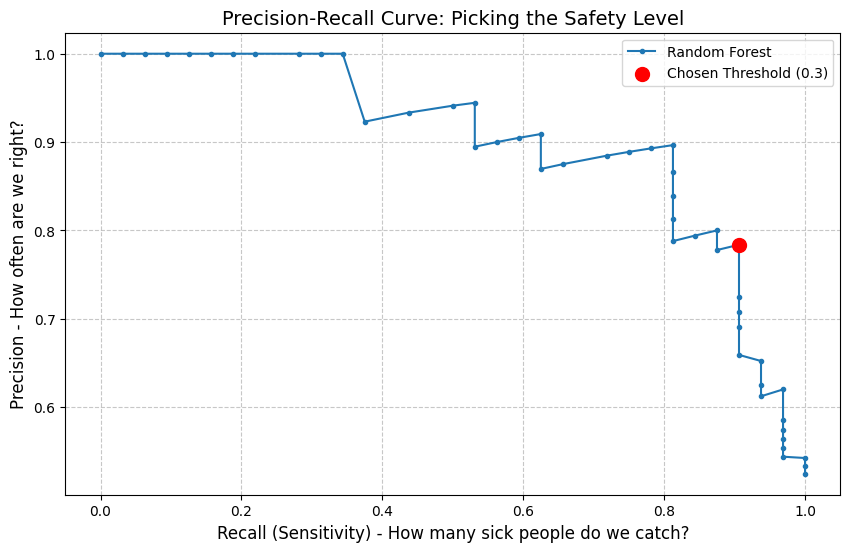

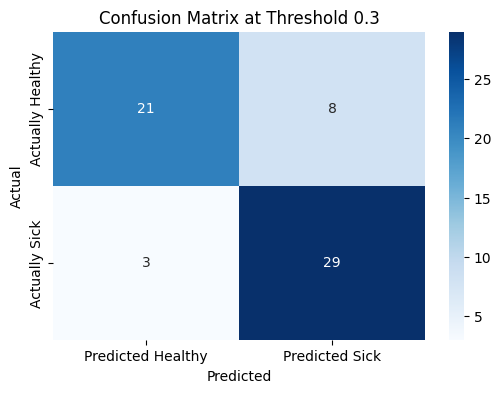

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, confusion_matrix
import seaborn as sns
import numpy as np

# ASSUMPTION: 'rf_honest', 'X_test', and 'y_test' are still in memory from the previous step.
# If not, re-run the 'honest_model.py' script first!

# 1. Get the Probabilities (instead of just Yes/No)
# predict_proba gives us two columns: [Prob of 0, Prob of 1]. We want column 1.
y_probs = rf_honest.predict_proba(X_test)[:, 1]

# 2. Apply a Lower Threshold (e.g., 0.3)
THRESHOLD = 0.3
y_pred_tuned = (y_probs >= THRESHOLD).astype(int)

# 3. Compare the Results
print(f"--- Standard Threshold (0.5) vs Tuned Threshold ({THRESHOLD}) ---\n")

# Re-calculate standard metrics for comparison
from sklearn.metrics import recall_score, precision_score
std_recall = recall_score(y_test, honest_predictions)
new_recall = recall_score(y_test, y_pred_tuned)
std_prec = precision_score(y_test, honest_predictions)
new_prec = precision_score(y_test, y_pred_tuned)

print(f"Recall (Sensitivity):    {std_recall:.2%}  ->  {new_recall:.2%} (Higher is better for safety)")
print(f"Precision:               {std_prec:.2%}  ->  {new_prec:.2%} (Lower is expected)")

# 4. Visualize the "Menu" of Options (Precision-Recall Curve)
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.scatter(new_recall, new_prec, color='red', label=f'Chosen Threshold ({THRESHOLD})', zorder=5, s=100)

plt.title('Precision-Recall Curve: Picking the Safety Level', fontsize=14)
plt.xlabel('Recall (Sensitivity) - How many sick people do we catch?', fontsize=12)
plt.ylabel('Precision - How often are we right?', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5. Show the new Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Healthy', 'Predicted Sick'], yticklabels=['Actually Healthy', 'Actually Sick'])
plt.title(f'Confusion Matrix at Threshold {THRESHOLD}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Saving the model

In [32]:
import pandas as pd
import joblib  # This is the standard tool for saving ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# --- STEP 1: LOAD & CLEAN (The "Honest" Pipeline) ---
# Assuming 'df' is loaded. If not, reload your CSV here.
# df = pd.read_csv('heart.csv')

print("Cleaning data...")
df_clean = df.drop_duplicates()
X = df_clean.drop('target', axis=1)
y = df_clean['target']

# --- STEP 2: TRAIN THE FINAL MODEL ---
print("Training final Random Forest...")
# We use the whole clean dataset now since we've already validated the accuracy
rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final.fit(X, y)

# --- STEP 3: SAVE THE BRAIN ---
model_filename = 'heart_disease_rf_model.pkl'
joblib.dump(rf_final, model_filename)
print(f"Model saved successfully as '{model_filename}'")

# --- STEP 4: DEFINE THE DIAGNOSTIC TOOL ---
def predict_patient_risk(patient_data, threshold=0.3):
    """
    Takes a dictionary of patient stats, loads the model, and gives a risk assessment.
    Threshold default is 0.3 (High Sensitivity).
    """
    # Load model (simulating a production app)
    loaded_model = joblib.load(model_filename)

    # Convert dict to DataFrame (model expects a table)
    patient_df = pd.DataFrame([patient_data])

    # Get probability (0 to 1)
    risk_score = loaded_model.predict_proba(patient_df)[0][1]

    # Make the decision
    is_sick = risk_score >= threshold

    return risk_score, is_sick

# --- STEP 5: TEST A FAKE PATIENT ---
# Let's invent a patient named "Gary from Madison"
# He's 58, has chest pain (cp=2), and some ST depression (oldpeak=1.5)
gary_stats = {
    'age': 58,
    'sex': 1,             # Male
    'cp': 2,              # Non-anginal pain (encoding varies!)
    'trestbps': 140,      # slightly high BP
    'chol': 210,          # borderline high
    'fbs': 0,             # normal blood sugar
    'restecg': 1,         # ST-T wave abnormality
    'thalach': 130,       # Max heart rate
    'exang': 1,           # Exercise induced angina (Yes)
    'oldpeak': 1.5,       # ST depression
    'slope': 1,           # Flat slope
    'ca': 0,              # No major vessels colored
    'thal': 2             # Fixed defect
}

print("\n--- DIAGNOSING PATIENT: GARY ---")
risk, result = predict_patient_risk(gary_stats)

print(f"Calculated Risk Score: {risk:.1%}")
print(f"Decision (Threshold {0.3}): {'HIGH RISK - REFER TO CARDIOLOGY' if result else 'Low Risk - Discharge'}")

Cleaning data...
Training final Random Forest...
Model saved successfully as 'heart_disease_rf_model.pkl'

--- DIAGNOSING PATIENT: GARY ---
Calculated Risk Score: 34.0%
Decision (Threshold 0.3): HIGH RISK - REFER TO CARDIOLOGY
